### Resolva o problema de classificação binária sobre o dataset "[Pima Indians Diabetes Database](https://data.world/data-society/pima-indians-diabetes-database) ([link alternativo no Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database))".

1. Separe os dados em **treino (80%)** e **teste (20%)**.
2. Crie e avalie modelos usando kNN, Logistic Regression, SVM e Naive Bayes. Aplique um **Grid Search com Validação Cruzada (CV)** com k=5 no k-Fold sobre o conjunto de treino. A métrica de avaliação usada deve ser a métrica **F1-Score**. Teste diferentes hiperparâmetros. Escolha o melhor algoritmo e hiperparâmetros baseado no Grid Search.
3. Treine um novo modelo usando o melhor resultado do Grid Search sobre todos os dados de treino (80% do dataset).
4. Avalie o modelo usando a métrica F1-Score sobre os dados de teste.
5. Desenhe as **regiões de decisão** em 2D. As regiões devem se basear nos dados de treino (80% do dataset). O gráfico deve mostrar os dados de teste (20% do dataset). Dica:
transforme as features em 2D usando a técnica PCA (Principal Component
Analysis), conforme mostramos em aula e no Jupyter Notebook que
disponibilizamos.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler


### Carregando dataset


In [35]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Split dos dados em treino e teste

In [36]:
X = df.drop(['Outcome'],axis=1).values
y = df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Kfold = 5

In [37]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)


## Knn

In [38]:
ks = [3,5,7,9,11,13,15]
parameters = {'n_neighbors': ks}
model_knn = KNeighborsClassifier()
clf_knn = GridSearchCV(model_knn, parameters, cv=cv)
clf_knn.fit(X_train, y_train)
y_pred = clf_knn.predict(X_test)
print(clf_knn.best_estimator_)
f1_score(y_test, y_pred)

KNeighborsClassifier(n_neighbors=9)


0.5294117647058824

## Logistic Regression

In [39]:
pen = ['l1', 'l2']
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
parameters={'C': Cs, 'penalty':pen, 'max_iter':[1000]}
model_lr = LogisticRegression()
clf_lr = GridSearchCV(model_lr, parameters, cv=cv)
clf_lr.fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)
print(clf_lr.best_estimator_)
f1_score(y_test, y_pred)


/home/joao/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joao/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/joao/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/joao/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/joao/.local/lib/python3.9/site-packages/sklearn/mod

LogisticRegression(C=0.1, max_iter=1000)


/home/joao/.local/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.7719179         nan 0.78497934        nan 0.78660536
        nan 0.78497934        nan 0.78172731        nan 0.78335333
        nan 0.78335333]
  warnings.warn(


0.5544554455445543

## SVM

In [40]:
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

model_svc = SVC()
clf_svc = GridSearchCV(model_svc, parameters, cv=cv)
clf_svc.fit(X_train, y_train)
y_pred = clf_svc.predict(X_test)
print(clf_svc.best_estimator_)
f1_score(y_test, y_pred)

SVC(C=1, gamma=0.0001)


0.5434782608695652

## Naive Bayes

In [41]:
steps = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4]
parameters = {'var_smoothing':steps}
model_nb = GaussianNB()
clf_nb = GridSearchCV(model_nb, parameters, cv=cv)
clf_nb.fit(X_train, y_train)
y_pred = clf_nb.predict(X_test)
print(clf_nb.best_estimator_)
f1_score(y_test, y_pred)

GaussianNB(var_smoothing=1e-08)


0.6086956521739131

### Logo, podemos ver que o melhor modelos que consegui foi:
## Algoritmo: Naive Bayes; var_smoothing=1e-08; f1_score = 0.609%

In [42]:
better_model = GaussianNB(var_smoothing=1e-8)
better_model.fit(X_train, y_train)
y_pred_ = better_model.predict(X_test)
print(f'{f1_score(y_test, y_pred_)*100:.2f}%')


60.87%


## Regiões de decisão 

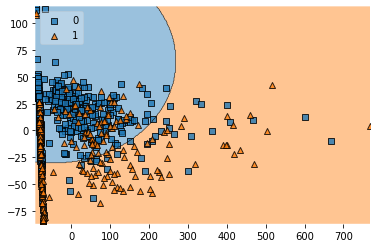

In [43]:
pca = PCA(n_components=2)
nb_ = GaussianNB(var_smoothing=1e-8)
X_2D = pca.fit_transform(X)
nb_.fit(X_2D, y)

plot_decision_regions(X_2D, y, clf=nb_, legend=2);
plt.show()

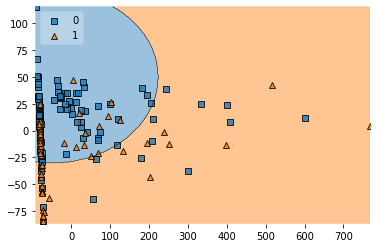

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_2D, y, test_size=0.2, random_state=42, stratify=y)

nb_ = GaussianNB(var_smoothing=1e-8)
nb_.fit(X_train, y_train)
plot_decision_regions(X_test, y_test, clf=nb_, legend=2)
plt.show()